In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import scipy
import string
from scipy.stats import spearmanr

In [3]:
# read in all_experiments_controlled_averaged.csv

ciber240 = pd.read_csv('t240ratios.csv', index_col=0)
ciber240['average240'] = (ciber240['AD_3_240']+ ciber240['AD_4_240'])/2
ciber240

,Tile,AD_3_240,AD_4_240,average240
0,AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...,0.210555,0.321582,0.266069
1,AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...,1.887052,2.548102,2.217577
2,AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...,2.828135,2.475357,2.651746
3,AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...,0.142991,0.179716,0.161354
4,AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...,0.346689,0.233850,0.290270
...,...,...,...,...
3016,TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTC...,0.787542,1.070927,0.929234
3017,TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...,106.583148,110.736868,108.660008
3018,TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...,0.256718,0.363392,0.310055
3019,TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...,8.912077,17.610107,13.261092


In [5]:
# read in unpublished data BYS4 data
# facs = pd.read_csv('Gcn4OrthologData_ToShare_20230414.csv', usecols=['Name','ArrayDNA','Activity_SCglucose']) #.fillna(0)
#label the controls
# facs['is_control'] = 'Experimental'
# facs.loc[20679:20681, 'is_control'] = 'Gal4'
# facs.loc[20682:20685, 'is_control'] = 'Gcn4'
# facs.loc[20686, 'is_control'] = 'War1'
# facs.loc[20687:20693, 'is_control'] = 'Gcn4'
# facs.loc[20694:20698, 'is_control'] = 'VP16'
# facs.loc[20699:20701, 'is_control'] = 'Rap1'
# facs.loc[20702:20705, 'is_control'] = 'VP16'
# facs.loc[20706:20710, 'is_control'] = 'CITED2'
# facs.loc[20711:20720, 'is_control'] = 'Gcn4_*_Low'
# facs.loc[20721:, 'is_control'] = 'Gcn4_*_High'


Rename the controls based on these activity scores:
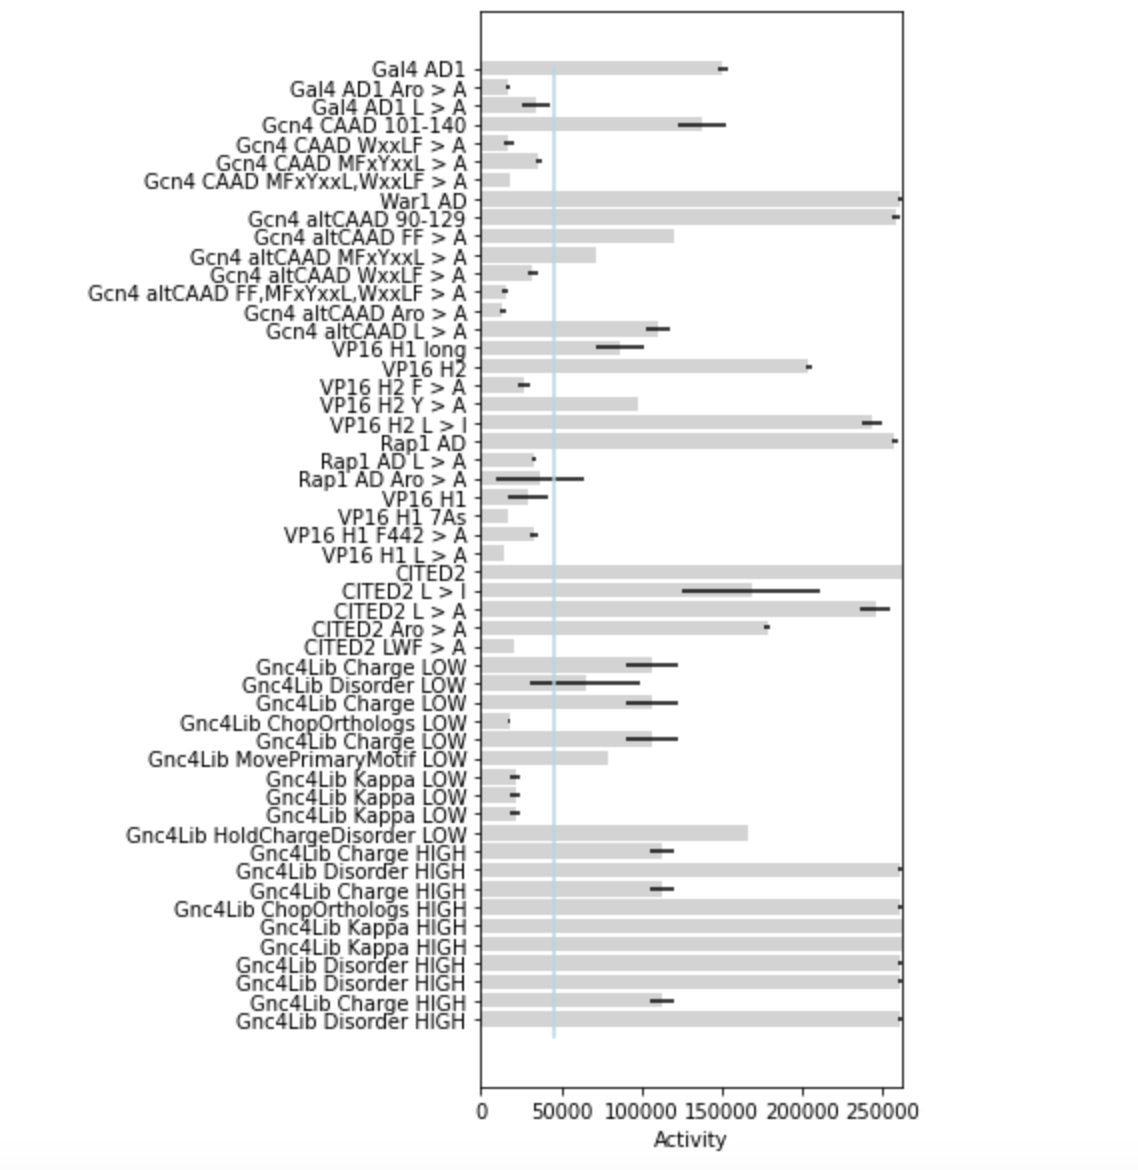
low = below blue line \
mid = <150000 \
high = >150000

In [4]:
# # read in unpublished data BYS4 data
facs = pd.read_csv('Gcn4OrthologData_ToShare_20230414_EC.csv', usecols=['Name',
#                                                                         'ADseq',
                                                                        'ArrayDNA','is_control','Activity_SCglucose']) #.fillna(0)
# m_file = "Melvin_Gcn4_NegControls.fasta"
# m_controls = []

# with open(m_file, 'r') as m:
#     for line in m:
#         if not line.startswith('>'):
#             m_controls.append(line.strip())


In [10]:
# facs['m_controls'] = False

# facs.loc[facs['ADseq'].isin(m_controls), 'm_controls'] = True

# facs[facs['m_controls']==True]

In [5]:
facs.head()

,Name,is_control,ArrayDNA,Activity_SCglucose
0,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_1,experimental,ATGGCTTTGAGAATTGAAGTTTATAATAGAATTGAATCTTCTACTG...,50935.24540
1,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_6,experimental,GAAGTTTATAATAGAATTGAATCTTCTACTGCTTCTACTGCTTTGC...,22071.19985
2,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_11,experimental,ATTGAATCTTCTACTGCTTCTACTGCTTTGCAAAGACAAGATTTGA...,25945.03809
3,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_16,experimental,GCTTCTACTGCTTTGCAAAGACAAGATTTGAGATATACATTTAGAT...,22474.23229
4,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_21,experimental,CAAAGACAAGATTTGAGATATACATTTAGATCTAATGCTAGAGCTG...,51467.13659


In [14]:
# facs_controls = facs.copy()
# facs_controls = facs_controls.iloc[20679:]
# facs_controls.tail()

In [6]:
facs = facs.dropna()
facs.head()

,Name,is_control,ArrayDNA,Activity_SCglucose
0,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_1,experimental,ATGGCTTTGAGAATTGAAGTTTATAATAGAATTGAATCTTCTACTG...,50935.24540
1,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_6,experimental,GAAGTTTATAATAGAATTGAATCTTCTACTGCTTCTACTGCTTTGC...,22071.19985
2,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_11,experimental,ATTGAATCTTCTACTGCTTCTACTGCTTTGCAAAGACAAGATTTGA...,25945.03809
3,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_16,experimental,GCTTCTACTGCTTTGCAAAGACAAGATTTGAGATATACATTTAGAT...,22474.23229
4,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g_21,experimental,CAAAGACAAGATTTGAGATATACATTTAGATCTAATGCTAGAGCTG...,51467.13659


In [12]:
intersection240 = pd.merge(ciber240, facs,
                       left_on = 'Tile', right_on = 'ArrayDNA',
                       how= 'inner')
intersection240[intersection240['is_control']!='experimental']

,Tile,AD_3_240,AD_4_240,average240,Name,is_control,ArrayDNA,Activity_SCglucose
174,AATTCTATGGCTGTCTTCTCTATCTTGAATAAGAATTTGTATCCAT...,0.337987,0.387221,0.362604,Gnc4Lib_Kappa_LOW_0,low,AATTCTATGGCTGTCTTCTCTATCTTGAATAAGAATTTGTATCCAT...,17633.71405
1023,CCACCAACTGATGTTTCTGCTGGTGATGAAGCTCATGCTGATGGTG...,0.462742,0.480207,0.471475,VP16N_7As_0,low,CCACCAACTGATGTTTCTGCTGGTGATGAAGCTCATGCTGATGGTG...,17234.98534
1261,GAATCTGAAGATTCTTCTGATGAAGATAATACTTCTGATGATAAAG...,1.518057,1.345727,1.431892,Gnc4Lib_Kappa_LOW_0,low,GAATCTGAAGATTCTTCTGATGAAGATAATACTTCTGATGATAAAG...,119833.91550
1381,GATGAACCAGCTATGTTGTTTGATACTTCTAATTCTTCTGTTGTTG...,0.714265,2.007510,1.360888,Gnc4Lib_Kappa_HIGH_0,high,GATGAACCAGCTATGTTGTTTGATACTTCTAATTCTTCTGTTGTTG...,209245.86270
1387,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,0.458623,0.348501,0.403562,GCN4alt_ARO_A_0,low,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,13789.99415
1388,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,48.195685,49.512424,48.854054,GCN4alt_FF_AA_0,mid,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,119575.57940
1427,GATTCTCCAGGTCCAGGTGCTACTCCACATGATTCTGCTCCATATG...,1.575804,1.294638,1.435221,VP16C_F2A_0,low,GATTCTCCAGGTCCAGGTGCTACTCCACATGATTCTGCTCCATATG...,26659.66132
2058,TCTACTGATTCTACTCCAATGTTTGAATATCAGAATTTGGAGAATA...,1.840985,1.368895,1.604940,Gnc4Lib_Charge_HIGH_0,mid,TCTACTGATTCTACTCCAATGTTTGAATATCAGAATTTGGAGAATA...,113052.30510
2059,TCTACTGATTCTACTCCAATGTTTGAATATGAAGGTTTGGAAGATA...,2.420419,2.179919,2.300169,Gnc4Lib_Disorder_LOW_0,mid,TCTACTGATTCTACTCCAATGTTTGAATATGAAGGTTTGGAAGATA...,64901.38900
2061,TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGATA...,6.090731,9.900563,7.995647,Gnc4Lib_Disorder_HIGH_0,high,TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGATA...,262143.00000


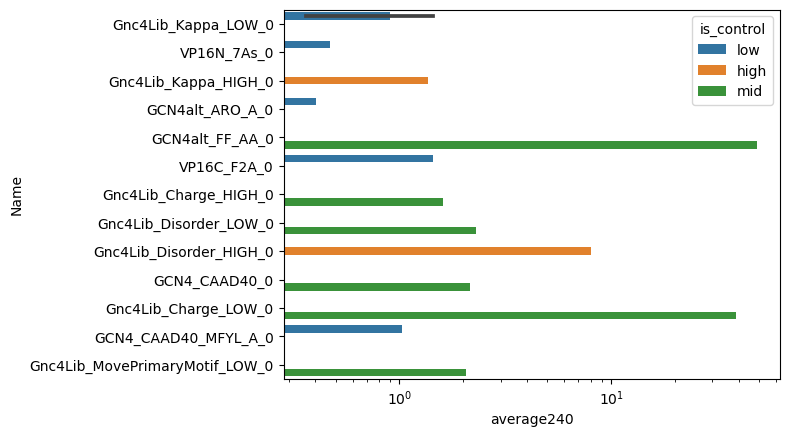

In [21]:
# July 17 interlude: make barplots of controls
ax = sns.barplot(intersection240[intersection240['is_control']!='experimental'],  x='average240', y='Name', hue='is_control')
ax.set_xscale('log')

In [22]:
ciber5 = pd.read_csv('t5ratios.csv', index_col=0)
ciber5['average5'] = (ciber5['AD_2_5'] + ciber5['AD_3_5']+ ciber5['AD_4_5'])/3
ciber5.head()

,Tile,AD_2_5,AD_3_5,AD_4_5,average5
0,AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...,0.639953,0.577796,0.365870,0.527873
1,AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...,2.134456,2.355490,2.850883,2.446943
2,AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...,3.265440,3.205113,3.176619,3.215724
3,AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...,0.258966,0.202133,0.301449,0.254182
4,AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...,0.377586,0.478914,0.445575,0.434025


In [23]:
intersection5 = pd.merge(ciber5, facs,
                       left_on = 'Tile', right_on = 'ArrayDNA',
                       how= 'inner')
intersection5[intersection5['is_control']!='experimental']

,Tile,AD_2_5,AD_3_5,AD_4_5,average5,Name,is_control,ArrayDNA,Activity_SCglucose
176,AATTCTATGGCTGTCTTCTCTATCTTGAATAAGAATTTGTATCCAT...,0.467979,0.498124,0.506697,0.490933,Gnc4Lib_Kappa_LOW_0,low,AATTCTATGGCTGTCTTCTCTATCTTGAATAAGAATTTGTATCCAT...,17633.71405
1014,CCACCAACTGATGTTTCTGCTGGTGATGAAGCTCATGCTGATGGTG...,0.465909,0.483036,0.463639,0.470861,VP16N_7As_0,low,CCACCAACTGATGTTTCTGCTGGTGATGAAGCTCATGCTGATGGTG...,17234.98534
1253,GAATCTGAAGATTCTTCTGATGAAGATAATACTTCTGATGATAAAG...,0.889491,0.902458,0.945374,0.912441,Gnc4Lib_Kappa_LOW_0,low,GAATCTGAAGATTCTTCTGATGAAGATAATACTTCTGATGATAAAG...,119833.91550
1370,GATGAACCAGCTATGTTGTTTGATACTTCTAATTCTTCTGTTGTTG...,3.285474,3.976186,2.555236,3.272299,Gnc4Lib_Kappa_HIGH_0,high,GATGAACCAGCTATGTTGTTTGATACTTCTAATTCTTCTGTTGTTG...,209245.86270
1376,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,0.446653,0.370676,0.329497,0.382275,GCN4alt_ARO_A_0,low,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,13789.99415
1377,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,57.719209,41.971763,28.939986,42.876986,GCN4alt_FF_AA_0,mid,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,119575.57940
1416,GATTCTCCAGGTCCAGGTGCTACTCCACATGATTCTGCTCCATATG...,0.930360,0.966709,0.896198,0.931089,VP16C_F2A_0,low,GATTCTCCAGGTCCAGGTGCTACTCCACATGATTCTGCTCCATATG...,26659.66132
2043,TCTACTGATTCTACTCCAATGTTTGAATATCAGAATTTGGAGAATA...,1.418242,1.483311,1.383110,1.428221,Gnc4Lib_Charge_HIGH_0,mid,TCTACTGATTCTACTCCAATGTTTGAATATCAGAATTTGGAGAATA...,113052.30510
2044,TCTACTGATTCTACTCCAATGTTTGAATATGAAGGTTTGGAAGATA...,1.934418,1.943840,1.793942,1.890733,Gnc4Lib_Disorder_LOW_0,mid,TCTACTGATTCTACTCCAATGTTTGAATATGAAGGTTTGGAAGATA...,64901.38900
2046,TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGATA...,9.209283,24.115308,21.786751,18.370448,Gnc4Lib_Disorder_HIGH_0,high,TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGATA...,262143.00000


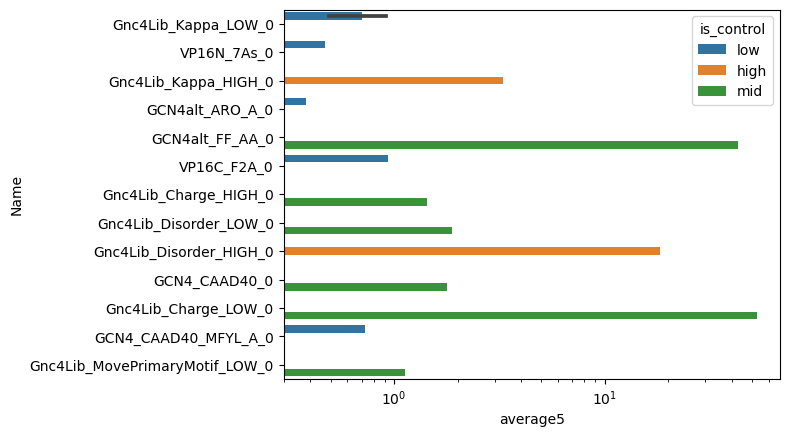

In [24]:
ax = sns.barplot(intersection5[intersection5['is_control']!='experimental'],  x='average5', y='Name', hue='is_control')
ax.set_xscale('log')

In [25]:
ciber10 = pd.read_csv('t10ratios.csv', index_col=0)
ciber10['average10'] = (ciber10['AD_2_10'] + ciber10['AD_3_10']+ ciber10['AD_4_10'])/3
intersection10 = pd.merge(ciber10, facs,
                       left_on = 'Tile', right_on = 'ArrayDNA',
                       how= 'inner')
intersection10[intersection10['is_control']!='experimental']

,Tile,AD_2_10,AD_3_10,AD_4_10,average10,Name,is_control,ArrayDNA,Activity_SCglucose
174,AATTCTATGGCTGTCTTCTCTATCTTGAATAAGAATTTGTATCCAT...,0.372285,0.384530,0.399374,0.385396,Gnc4Lib_Kappa_LOW_0,low,AATTCTATGGCTGTCTTCTCTATCTTGAATAAGAATTTGTATCCAT...,17633.71405
305,ACTGACTTTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...,3.593703,0.001000,0.001000,1.198568,CITED2_0,high,ACTGACTTTATTGATGAAGAAGTCTTGATGTCTTTGGTTATTGAAA...,262011.59690
1015,CCACCAACTGATGTTTCTGCTGGTGATGAAGCTCATGCTGATGGTG...,0.334639,0.346201,0.374510,0.351784,VP16N_7As_0,low,CCACCAACTGATGTTTCTGCTGGTGATGAAGCTCATGCTGATGGTG...,17234.98534
1253,GAATCTGAAGATTCTTCTGATGAAGATAATACTTCTGATGATAAAG...,0.968847,0.974214,0.956986,0.966682,Gnc4Lib_Kappa_LOW_0,low,GAATCTGAAGATTCTTCTGATGAAGATAATACTTCTGATGATAAAG...,119833.91550
1372,GATGAACCAGCTATGTTGTTTGATACTTCTAATTCTTCTGTTGTTG...,0.684515,0.001000,0.819882,0.501799,Gnc4Lib_Kappa_HIGH_0,high,GATGAACCAGCTATGTTGTTTGATACTTCTAATTCTTCTGTTGTTG...,209245.86270
1378,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,0.289509,0.275917,0.298437,0.287954,GCN4alt_ARO_A_0,low,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,13789.99415
1379,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,104.923299,32.167507,84.998605,74.029804,GCN4alt_FF_AA_0,mid,GATGATGCTGTTGTTGAATCTGCTGCTTCTTCTTCTACTGATTCTA...,119575.57940
1418,GATTCTCCAGGTCCAGGTGCTACTCCACATGATTCTGCTCCATATG...,0.914923,0.738671,0.957635,0.870409,VP16C_F2A_0,low,GATTCTCCAGGTCCAGGTGCTACTCCACATGATTCTGCTCCATATG...,26659.66132
2044,TCTACTGATTCTACTCCAATGTTTGAATATCAGAATTTGGAGAATA...,1.566900,1.510744,1.464418,1.514021,Gnc4Lib_Charge_HIGH_0,mid,TCTACTGATTCTACTCCAATGTTTGAATATCAGAATTTGGAGAATA...,113052.30510
2045,TCTACTGATTCTACTCCAATGTTTGAATATGAAGGTTTGGAAGATA...,2.007276,2.055769,1.880874,1.981306,Gnc4Lib_Disorder_LOW_0,mid,TCTACTGATTCTACTCCAATGTTTGAATATGAAGGTTTGGAAGATA...,64901.38900


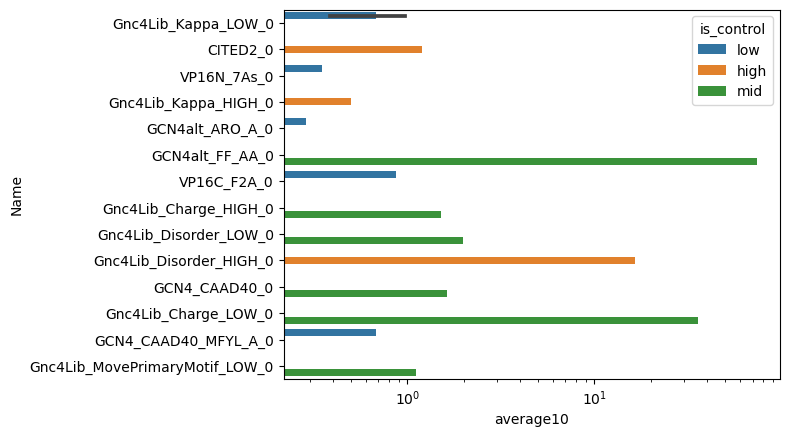

In [26]:
ax = sns.barplot(intersection10[intersection10['is_control']!='experimental'],  x='average10', y='Name', hue='is_control')
ax.set_xscale('log')

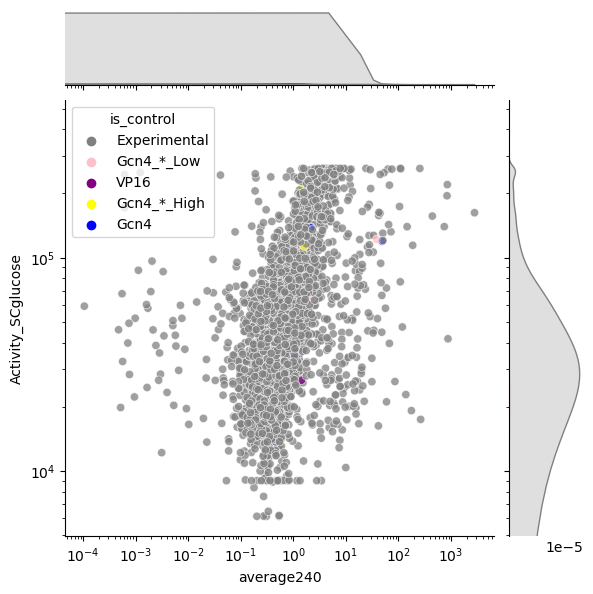

In [7]:
palette = {
    'Experimental': 'gray',
    'Gal4': 'red',
    'Gcn4': 'blue',
    'War1': 'green',
    'VP16': 'purple',
    'Rap1': 'orange',
    'CITED2': 'brown',
    'Gcn4_*_Low': 'pink',
    'Gcn4_*_High': 'yellow'
}

p = sns.jointplot(intersection240, 
                  x='average240', y='Activity_SCglucose', 
                   hue='is_control', palette=palette,
                  markers=['o', 's', '^', 'P', 'D', 'X', '*', 'v', '<', '>'], 
                  joint_kws={'alpha': 0.75})
p.ax_joint.set_xscale('log')
p.ax_joint.set_yscale('log')
plt.show()

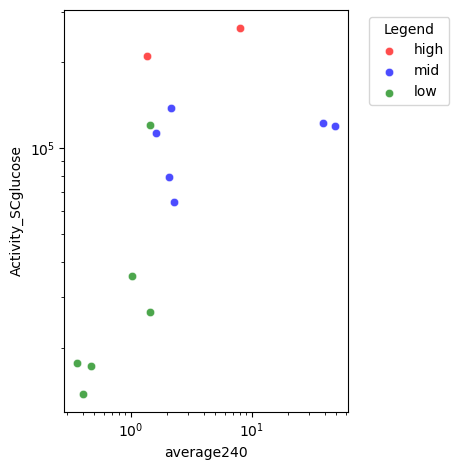

In [30]:
palette = {
    'Experimental': 'gray',
    'high': 'red',
    'mid': 'blue',
    'low': 'green',
    
}

# # Create the scatter plot
# plt.figure(figsize=(10, 6))
# # Plot experimental points first
# experimental_points = intersection240[intersection240['is_control'] == 'experimental']
# sns.scatterplot(
#     data=experimental_points,
#     x='average240',
#     y='Activity_SCglucose',
#     color='gray',
#     alpha=0.3,  # Lower alpha for experimental points to enhance visibility of controls
#     label='Experimental',

# )

# Plot control points on top
control_points = intersection240[intersection240['is_control'] != 'Experimental']
for label, color in palette.items():
    if label != 'Experimental':
        subset = control_points[control_points['is_control'] == label]
        sns.scatterplot(
            data=subset,
            x='average240',
            y='Activity_SCglucose',
            label=label,
            color=color,
            alpha=0.7,
        )
# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')
       
        
# Customize the legend to improve readability and prevent cutoff
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")
plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust the layout to make room for the legend

# Show the plot
plt.show()

In [35]:
intersection240[intersection240['is_control']=='high']

,Tile,AD_3_240,AD_4_240,average240,ADseq,Name,is_control,ArrayDNA,Activity_SCglucose,m_controls
1484,GATGAACCAGCTATGTTGTTTGATACTTCTAATTCTTCTGTTGTTG...,0.714265,2.007510,1.360888,DEPAMLFDTSNSSVVAEIEWTTLFETSLKNETDPYSDINK,Gnc4Lib_Kappa_HIGH_0,high,GATGAACCAGCTATGTTGTTTGATACTTCTAATTCTTCTGTTGTTG...,209245.8627,True
2213,TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGATA...,6.090731,9.900563,7.995647,STDSTPMFEYENLEDNMKEWTSLFDNDISVNTDDLSLADK,Gnc4Lib_Disorder_HIGH_0,high,TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGATA...,262143.0000,True


In [33]:
intersection240

,Tile,AD_3_240,AD_4_240,average240,ADseq,Name,is_control,ArrayDNA,Activity_SCglucose,m_controls
0,AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...,0.210555,0.321582,0.266069,KQRSQPLQPIIIDDIKDAAALKRAKNTEAARRSRARKMER,Cdub_XP_002418875.1_CandidaDubliniensisCD36_246,experimental,AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...,NaN,False
1,AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...,1.887052,2.548102,2.217577,KQGNKMFSGNYTSYHLPPPNMRLQPHAELDLLDFATFDGG,Sordariomycetes_jgi|Gelte1|443597|fgenesh1_pg....,experimental,AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...,NaN,False
2,AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...,2.828135,2.475357,2.651746,KQLQTNSNMSDDTFAGLPSGTVSPTDLMLDASAPSSATFT,Eurotiomycetes_jgi|Monpu1|447850|e_gw1.132.11....,experimental,AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...,128220.88420,False
3,AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...,0.142991,0.179716,0.161354,KQLPLSPKVKRSQSEAALSKSTPPQLRRLFMSHSAAAPNF,Leotiomycetes_jgi|Rhier1|657659|fgenesh1_pg.13...,experimental,AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...,33434.97616,False
4,AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...,0.346689,0.233850,0.290270,KQFHQKVVADTTTTTNTTTTTIKNEPGLELSLNLPEMQKA,Cdub_XP_002418875.1_CandidaDubliniensisCD36_26,experimental,AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...,68876.00998,False
...,...,...,...,...,...,...,...,...,...,...
3017,TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTC...,0.787542,1.070927,0.929234,FGSADFDTTAGDPWFPLFPQESTTATKDVTSIEEIQKLQT,Sordariomycetes_jgi|Colac2|536182|gw1.162.9.1_86,experimental,TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTC...,NaN,False
3018,TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...,106.583148,110.736868,108.660008,FGSSGEYDVAGSQWFSLFPDQNASVETTGAEQPLGDRVQN,Sordariomycetes_jgi|Verdah1|340552|e_gw1.9.104...,experimental,TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...,77077.45196,False
3019,TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...,0.256718,0.363392,0.310055,FVLYDQPALPRRSPSAPQPAPTFNNGPHFYANSAPSSTTE,Dothideomycetes_jgi|Boeex1|443056|MIX4721_1513...,experimental,TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...,18186.39627,False
3020,TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...,8.912077,17.610107,13.261092,FVLFDSPQPTRTTVNRSASSPATAAVSAFGSLHNHNASTR,Sordariomycetes_jgi|Entma1|248621|e_gw1.11.327...,experimental,TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...,34787.24351,False


In [34]:
controltile2 = 'GATGAACCAGCTATGTTGTTTGATACTTCTAATTCTTCTGTTGTTGCTGAAATTGAATGGACTACTTTGTTTGAAACTTCTTTGAAGAATGAAACTGATCCATATTCTGATATTAATAAA'
intersection240[intersection240['Tile']==controltile2]

,Tile,AD_3_240,AD_4_240,average240,ADseq,Name,is_control,ArrayDNA,Activity_SCglucose,m_controls
1484,GATGAACCAGCTATGTTGTTTGATACTTCTAATTCTTCTGTTGTTG...,0.714265,2.00751,1.360888,DEPAMLFDTSNSSVVAEIEWTTLFETSLKNETDPYSDINK,Gnc4Lib_Kappa_HIGH_0,high,GATGAACCAGCTATGTTGTTTGATACTTCTAATTCTTCTGTTGTTG...,209245.8627,True


In [29]:
intersection240['average240'].corr(intersection240['Activity_SCglucose'])

0.08277962951026024

In [30]:
spearmanr(intersection240['average240'], intersection240['Activity_SCglucose'])

SignificanceResult(statistic=0.5275118473860889, pvalue=1.8190339682584296e-201)

In [11]:
ciber5 = pd.read_csv('t5ratios.csv', index_col=0)
ciber5['average5'] = (ciber5['AD_2_5']+ ciber5['AD_3_5']+ciber5['AD_4_5'])/3
intersection5 = pd.merge(ciber5, facs,
                       left_on = 'Tile', right_on = 'ArrayDNA',
                       how= 'inner')


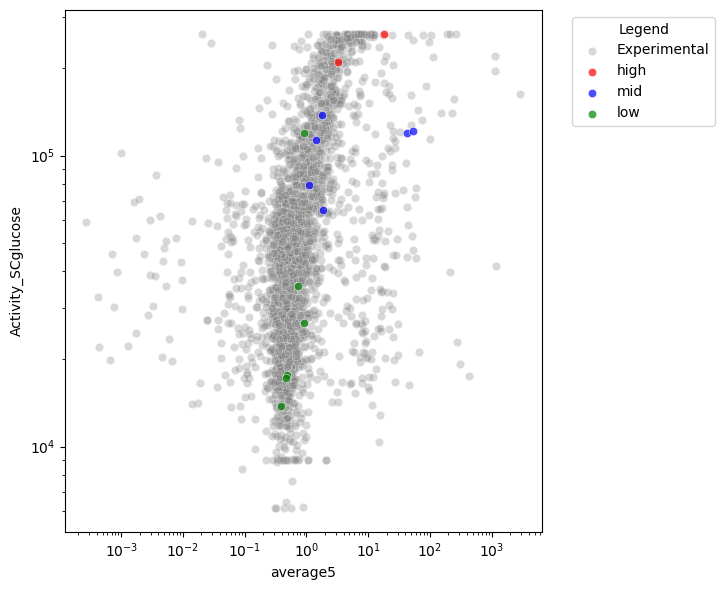

In [16]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
# Plot experimental points first
experimental_points = intersection5[intersection5['is_control'] == 'experimental']
sns.scatterplot(
    data=experimental_points,
    x='average5',
    y='Activity_SCglucose',
    color='gray',
    alpha=0.3,  # Lower alpha for experimental points to enhance visibility of controls
    label='Experimental',

)

# Plot control points on top
control_points = intersection5[intersection5['is_control'] != 'Experimental']
for label, color in palette.items():
    if label != 'Experimental':
        subset = control_points[control_points['is_control'] == label]
        sns.scatterplot(
            data=subset,
            x='average5',
            y='Activity_SCglucose',
            label=label,
            color=color,
            alpha=0.7,
        )
# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')
       
        
# Customize the legend to improve readability and prevent cutoff
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")
plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust the layout to make room for the legend

# Show the plot
plt.show()

In [40]:
intersection5['average5'].corr(intersection5['Activity_SCglucose'])

0.08165633160587156

In [41]:
spearmanr(intersection5['average5'], intersection5['Activity_SCglucose'])

SignificanceResult(statistic=0.506382081432751, pvalue=7.001511228959348e-182)

In [ ]:
ciber10 = pd.read_csv('t10ratios.csv', index_col=0)
ciber10['average10'] = (ciber10['AD_2_10']+ ciber10['AD_3_10']+ciber10['AD_4_10'])/3
intersection10 = pd.merge(ciber10, facs,
                       left_on = 'Tile', right_on = 'ArrayDNA',
                       how= 'inner', hue='is_control')


p = sns.jointplot(intersection10, x='average10', y='Activity_SCglucose', marker='.')
p.ax_joint.set_xscale('log')
p.ax_joint.set_yscale('log')


In [44]:
intersection10['average10'].corr(intersection10['Activity_SCglucose'], method='spearman')

0.5354948363890728

In [45]:
spearmanr(intersection10['average10'], intersection10['Activity_SCglucose'])

SignificanceResult(statistic=0.5354948363890728, pvalue=5.226755953392085e-207)

In [46]:
ciber15 = pd.read_csv('t15ratios.csv', index_col=0)
ciber15['average_15'] = (ciber15['AD_3_15']+ ciber15['AD_4_15'])/2
ciber30 = pd.read_csv('t30ratios.csv', index_col=0)
ciber30['average30'] = (ciber30['AD_2_30']+ ciber30['AD_4_30'])/2
ciber180 = pd.read_csv('t180ratios.csv', index_col=0)
ciber180['average180'] = (ciber180['AD_2_180']+ ciber180['AD_3_180']+ciber180['AD_4_180'])/3
ciber240 = pd.read_csv('t240ratios.csv', index_col=0)
ciber240['average_240'] = (ciber240['AD_3_240']+ ciber240['AD_4_240'])/2


allciber = pd.merge(ciber5, ciber10, on='Tile')
allciber = pd.merge(allciber, ciber15, on= 'Tile')
allciber = pd.merge(allciber, ciber30, on= 'Tile')
allciber = pd.merge(allciber, ciber180, on= 'Tile')
allciber = pd.merge(allciber, ciber240, on= 'Tile')

allciber.head()

,Tile,AD_2_5,AD_3_5,AD_4_5,average5,AD_2_10,AD_3_10,AD_4_10,average10,AD_3_15,...,AD_2_30,AD_4_30,average30,AD_2_180,AD_3_180,AD_4_180,average180,AD_3_240,AD_4_240,average_240
0,AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...,0.639953,0.577796,0.365870,0.527873,0.255990,0.556407,0.423654,0.412017,0.152937,...,0.204792,0.262343,0.233567,0.276424,0.144632,0.165091,0.195383,0.210555,0.321582,0.266069
1,AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...,2.134456,2.355490,2.850883,2.446943,1.677380,2.155017,1.558749,1.797048,1.870195,...,1.343627,1.244338,1.293983,2.614412,1.665917,2.914511,2.398280,1.887052,2.548102,2.217577
2,AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...,3.265440,3.205113,3.176619,3.215724,3.866712,3.235748,3.601998,3.568153,3.724475,...,3.755231,3.693531,3.724381,3.148173,2.404555,2.745354,2.766027,2.828135,2.475357,2.651746
3,AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...,0.258966,0.202133,0.301449,0.254182,0.162050,0.233109,0.148558,0.181239,0.143674,...,0.078846,0.148514,0.113680,0.178972,0.221120,0.122682,0.174258,0.142991,0.179716,0.161354
4,AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...,0.377586,0.478914,0.445575,0.434025,0.340042,0.350106,0.364770,0.351639,0.308056,...,0.289343,0.235781,0.262562,0.290998,0.293205,0.255368,0.279857,0.346689,0.233850,0.290270


In [47]:
allciber = allciber[allciber.columns.drop(list(allciber.filter(regex='AD_')))]
allciber

,Tile,average5,average10,average_15,average30,average180,average_240
0,AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...,0.527873,0.412017,0.371719,0.233567,0.195383,0.266069
1,AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...,2.446943,1.797048,2.105348,1.293983,2.398280,2.217577
2,AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...,3.215724,3.568153,3.807396,3.724381,2.766027,2.651746
3,AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...,0.254182,0.181239,0.143251,0.113680,0.174258,0.161354
4,AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...,0.434025,0.351639,0.318744,0.262562,0.279857,0.290270
...,...,...,...,...,...,...,...
2935,TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTC...,0.869298,0.772724,0.802392,0.900829,0.778042,0.929234
2936,TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...,60.014309,66.728166,69.915503,27.931731,153.315274,108.660008
2937,TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...,0.379623,0.265990,0.199557,0.249312,0.444110,0.310055
2938,TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...,15.529519,35.187842,8.621484,15.696828,11.194090,13.261092


In [ ]:
controls_intersection = pd.merge(allciber, facs_controls, left_on='Tile', right_on = 'ArrayDNA')
controls_intersection